In [221]:
from statsmodels.regression import linear_model as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm2
from sklearn.metrics import r2_score
import scipy

In [222]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [223]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')
sorted(os.listdir())

['Arcuate_Fasciculus_L.tsv',
 'Arcuate_Fasciculus_R.tsv',
 'BrainHack_Padova.ipynb',
 'Cingulum_Frontal_Parahippocampal_L.tsv',
 'Cingulum_Frontal_Parahippocampal_R.tsv',
 'Cingulum_Frontal_Parietal_L.tsv',
 'Cingulum_Frontal_Parietal_R.tsv',
 'Cingulum_Parahippocampal_L.tsv',
 'Cingulum_Parahippocampal_Parietal_L.tsv',
 'Cingulum_Parahippocampal_Parietal_R.tsv',
 'Cingulum_Parahippocampal_R.tsv',
 'Cingulum_Rarolfactory_L.tsv',
 'Cingulum_Rarolfactory_R.tsv',
 'Corpus_Callosum_Body.tsv',
 'Corpus_Callosum_Forceps_Major.tsv',
 'Corpus_Callosum_Forceps_Minor.tsv',
 'Corpus_Callosum_Tapetum.tsv',
 'Corticobulbar_Tract_L.tsv',
 'Corticobulbar_Tract_R.tsv',
 'Corticopontine_Tract_Frontal_L.tsv',
 'Corticopontine_Tract_Frontal_R.tsv',
 'Corticopontine_Tract_Occipital_L.tsv',
 'Corticopontine_Tract_Occipital_R.tsv',
 'Corticopontine_Tract_Parietal_L.tsv',
 'Corticopontine_Tract_Parietal_R.tsv',
 'Corticospinal_Tract_L.tsv',
 'Corticospinal_Tract_R.tsv',
 'Corticostriatal_Tract_Anterior_L.tsv

#**Association of Microstructural white matter and personality traits based on Human connectome project dataset**

In [224]:
csvfile = sorted(os.listdir())[1]
example = pd.read_csv(csvfile, sep =  '\t', index_col = 0)
col =example.columns
example[col[:]].head()
# first column (index of the pandas DataFrame): subjects ID

,tract,tags,number of tracts,mean length(mm),span(mm),curl,elongation,diameter(mm),volume(mm^3),trunk volume(mm^3),branch volume(mm^3),total surface area(mm^2),total radius of end regions(mm),total area of end regions(mm^2),irregularity,area of end region 1(mm^2),radius of end region 1(mm),irregularity of end region 1,area of end region 2(mm^2),radius of end region 2(mm),irregularity of end region 2,qa,nqa,dti_fa,md,ad,rd,gfa,iso,rdi,nrdi02L,nrdi04L,nrdi06L,Family_ID,Release,Acquisition,Gender,Gender.1,Age,Age_in_Yrs,...,NEORAW_31,NEORAW_32,NEORAW_33,NEORAW_34,NEORAW_35,NEORAW_36,NEORAW_37,NEORAW_38,NEORAW_39,NEORAW_40,NEORAW_41,NEORAW_42,NEORAW_43,NEORAW_44,NEORAW_45,NEORAW_46,NEORAW_47,NEORAW_48,NEORAW_49,NEORAW_50,NEORAW_51,NEORAW_52,NEORAW_53,NEORAW_54,NEORAW_55,NEORAW_56,NEORAW_57,NEORAW_58,NEORAW_59,NEORAW_60,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
100307,Arcuate_Fasciculus_R,dsi-studio-atk,10496.0,131.378,39.5620,3.32082,9.19801,14.2833,21051.0,19849.0,1202.0,40748.0,18.6828,3617.0,6.91199,1746.0,7.73811,0.107740,1871.0,10.94460,0.201131,0.225301,0.248174,0.341782,0.577167,0.796892,0.467393,0.115883,0.403939,0.376176,0.251907,0.035318,0.0,51488_81352,Q1,Q01,F,1,26-30,27,...,A,A,D,A,A,SD,A,N,D,A,D,D,N,D,D,A,A,D,A,A,D,SA,A,SD,D,D,D,D,SD,A,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
100408,Arcuate_Fasciculus_R,dsi-studio-atk,10805.0,138.595,47.7411,2.90305,10.74830,12.8946,18099.0,17863.0,236.0,33748.0,17.4124,3536.0,6.01094,1310.0,7.72054,0.142947,2226.0,9.69189,0.132569,0.235542,0.288548,0.382923,0.529628,0.759137,0.415025,0.119219,0.406605,0.381338,0.252138,0.033855,0.0,51730_81594,Q3,Q03,M,2,31-35,33,...,A,D,D,A,A,SD,A,SD,D,A,D,N,D,N,D,N,A,D,SA,A,D,A,A,N,D,N,D,A,A,A,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
101107,Arcuate_Fasciculus_R,dsi-studio-atk,9692.0,137.519,37.6322,3.65428,10.43420,13.1796,18761.0,8926.0,9835.0,38338.0,20.6269,3121.0,6.73310,1449.0,6.89515,0.103079,1672.0,13.73180,0.354297,0.226054,0.254177,0.338129,0.562818,0.773395,0.457483,0.113139,0.420302,0.389329,0.258333,0.035142,0.0,51969_81833,S500,Q06,M,2,22-25,22,...,A,N,D,A,SA,SA,N,N,N,SA,SD,N,D,A,SD,N,A,SD,SA,A,SD,SA,SA,A,D,N,SD,A,D,A,6.8,108.79,97.19,1.0,50.1,134.65,131.38,1.84,0.0,1.84
102311,Arcuate_Fasciculus_R,dsi-studio-atk,11244.0,134.410,37.9741,3.53953,9.54367,14.0837,20939.0,18646.0,2293.0,39387.0,21.3915,3942.0,6.62299,1572.0,7.73086,0.119441,2370.0,13.66060,0.247368,0.268240,0.274683,0.386692,0.537020,0.771358,0.419721,0.123726,0.438493,0.414109,0.273624,0.036690,0.0,51679_81543,S500,Q06,F,1,26-30,26,...,D,A,D,A,SA,D,D,SD,D,SA,SD,A,A,D,SD,D,A,D,A,SA,SD,A,A,N,D,D,D,N,A,SA,4.4,122.25,110.45,1.0,52.2,98.31,99.06,1.80,0.0,1.80
102513,Arcuate_Fasciculus_R,dsi-studio-atk,8644.0,147.513,35.9243,4.10621,10.74340,13.7305,21842.0,2833.0,19009.0,49514.0,26.9380,3493.0,7.78148,937.0,10.86560,0.395841,2556.0,16.07240,0.317504,0.201666,0.265694,0.381381,0.558666,0.792176,0.441912,0.126351,0.321768,0.306851,0.204164,0.028040,0.0,56077_85897,S900,Q10,M,2,26-30,30,...,N,D,N,A,N,D,N,SD,N,A,D,N,A,N,A,D,N,SD,A,N,SD,A,SA,N,D,SD,A,SA,A,SA,5.2,108.79,98.04,2.0,54.3,84.07,82.37,1.92,0.0,1.92


In [225]:
example.columns

Index(['tract', 'tags', 'number of tracts', 'mean length(mm)', 'span(mm)',
       'curl', 'elongation', 'diameter(mm)', 'volume(mm^3)',
       'trunk volume(mm^3)',
       ...
       'Noise_Comp', 'Odor_Unadj', 'Odor_AgeAdj', 'PainIntens_RawScore',
       'PainInterf_Tscore', 'Taste_Unadj', 'Taste_AgeAdj', 'Mars_Log_Score',
       'Mars_Errs', 'Mars_Final'],
      dtype='object', length=618)

In [226]:
example[col[30:]].head()

,nrdi02L,nrdi04L,nrdi06L,Family_ID,Release,Acquisition,Gender,Gender.1,Age,Age_in_Yrs,Handedness,NEOFAC_A,NEOFAC_O,NEOFAC_C,NEOFAC_N,NEOFAC_E,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,3T_Full_Task_fMRI,3T_tMRI_PctCompl,fMRI_WM_PctCompl,fMRI_Gamb_PctCompl,fMRI_Mot_PctCompl,fMRI_Lang_PctCompl,fMRI_Soc_PctCompl,fMRI_Rel_PctCompl,fMRI_Emo_PctCompl,3T_dMRI_Compl,3T_dMRI_PctCompl,dMRI_3T_ReconVrs,fMRI_3T_ReconVrs,7T_Full_MR_Compl,7T_RS-fMRI_Count,7T_RS-fMRI_PctCompl,7T_Full_Task_fMRI,7T_tMRI_PctCompl,fMRI_Movie_Compl,...,NEORAW_31,NEORAW_32,NEORAW_33,NEORAW_34,NEORAW_35,NEORAW_36,NEORAW_37,NEORAW_38,NEORAW_39,NEORAW_40,NEORAW_41,NEORAW_42,NEORAW_43,NEORAW_44,NEORAW_45,NEORAW_46,NEORAW_47,NEORAW_48,NEORAW_49,NEORAW_50,NEORAW_51,NEORAW_52,NEORAW_53,NEORAW_54,NEORAW_55,NEORAW_56,NEORAW_57,NEORAW_58,NEORAW_59,NEORAW_60,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
100307,0.251907,0.035318,0.0,51488_81352,Q1,Q01,F,1,26-30,27,95,37.0,24.0,35.0,15.0,37.0,1,1,1,4,100.0,1,100.0,100,100.0,100,100.0,100.0,100.0,100,1,100.0,r227,r177,0,0,0,0,0.0,0,...,A,A,D,A,A,SD,A,N,D,A,D,D,N,D,D,A,A,D,A,A,D,SA,A,SD,D,D,D,D,SD,A,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
100408,0.252138,0.033855,0.0,51730_81594,Q3,Q03,M,2,31-35,33,55,33.0,29.0,34.0,15.0,33.0,1,1,1,4,100.0,1,100.0,100,100.0,100,100.0,100.0,100.0,100,1,100.0,r227,r177,0,0,0,0,0.0,0,...,A,D,D,A,A,SD,A,SD,D,A,D,N,D,N,D,N,A,D,SA,A,D,A,A,N,D,N,D,A,A,A,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
101107,0.258333,0.035142,0.0,51969_81833,S500,Q06,M,2,22-25,22,5,28.0,35.0,37.0,12.0,28.0,1,2,2,4,100.0,1,100.0,100,100.0,100,100.0,100.0,100.0,100,1,100.0,r227,r227,0,0,0,0,0.0,0,...,A,N,D,A,SA,SA,N,N,N,SA,SD,N,D,A,SD,N,A,SD,SA,A,SD,SA,SA,A,D,N,SD,A,D,A,6.8,108.79,97.19,1.0,50.1,134.65,131.38,1.84,0.0,1.84
102311,0.273624,0.036690,0.0,51679_81543,S500,Q06,F,1,26-30,26,10,29.0,34.0,38.0,18.0,27.0,1,1,1,4,100.0,1,100.0,100,100.0,100,100.0,100.0,100.0,100,1,100.0,r227,r227,1,4,100,1,100.0,1,...,D,A,D,A,SA,D,D,SD,D,SA,SD,A,A,D,SD,D,A,D,A,SA,SD,A,A,N,D,D,D,N,A,SA,4.4,122.25,110.45,1.0,52.2,98.31,99.06,1.80,0.0,1.80
102513,0.204164,0.028040,0.0,56077_85897,S900,Q10,M,2,26-30,30,50,26.0,39.0,27.0,12.0,27.0,1,2,2,4,100.0,1,100.0,100,100.0,100,100.0,100.0,100.0,100,1,100.0,r227,r227,0,0,0,0,0.0,0,...,N,D,N,A,N,D,N,SD,N,A,D,N,A,N,A,D,N,SD,A,N,SD,A,SA,N,D,SD,A,SA,A,SA,5.2,108.79,98.04,2.0,54.3,84.07,82.37,1.92,0.0,1.92


In [227]:
diff_labels = example.columns[example.columns.tolist().index("qa"):example.columns.tolist().index("rdi") + 1].tolist()
pers_labels = example.columns[example.columns.tolist().index("NEOFAC_A"):example.columns.tolist().index("NEOFAC_E") + 1].tolist()
diff_labels, pers_labels


#same as doing

#diff_labels = ["qa", "nqa", "dti_fa", "md", "ad", "rd", "gfa", "iso","rdi"]
#pers_labels = ["NEOFAC_A","NEOFAC_O", "NEOFAC_C", "NEOFAC_N", "NEOFAC_E"]

(['qa', 'nqa', 'dti_fa', 'md', 'ad', 'rd', 'gfa', 'iso', 'rdi'],
 ['NEOFAC_A', 'NEOFAC_O', 'NEOFAC_C', 'NEOFAC_N', 'NEOFAC_E'])

# Linear regression 

In [228]:
dic = {"pval": [], "coef" : [], "file" : [], "diff_labels":[], "pers_labels" : []}

for file in sorted(os.listdir()):
  if "tsv" in file:
    fd = pd.read_csv(file, sep =  '\t', index_col = 0)
    for s in diff_labels:
      for l in pers_labels:
        x = fd[s]
        idx = np.where(np.isnan(x))
        y = fd[l]
        idx2 = np.where(np.isnan(y)) 
        x = np.delete(np.array(x),idx2[0].tolist()+ idx[0].tolist())
        y = np.delete(np.array(y),idx2[0].tolist()+ idx[0].tolist())
        x2 = sm2.add_constant(x)
        ls = sm.OLS(y, x2).fit()
        
        dic["pval"].append(ls.pvalues[1])
        dic["coef"].append(ls.params[1])
        dic["file"].append(file)
        dic["diff_labels"].append(s)
        dic["pers_labels"].append(l)

In [229]:
for l in dic.keys():
  dic[l] = np.array(dic[l])

In [230]:
idxs = np.array(dic["pval"]) < 0.0007
print(dic["file"][idxs], dic["diff_labels"][idxs], dic["pers_labels"][idxs])

['Cingulum_Parahippocampal_R.tsv' 'Cingulum_Parahippocampal_R.tsv'
 'Inferior_Cerebellar_Peduncle_L.tsv' 'Inferior_Cerebellar_Peduncle_R.tsv'
 'Uncinate_Fasciculus_R.tsv'] ['md' 'ad' 'nqa' 'nqa' 'nqa'] ['NEOFAC_A' 'NEOFAC_A' 'NEOFAC_N' 'NEOFAC_N' 'NEOFAC_N']


# Focusing on a particular combination of diffusion markers and personality traits to see which model describes better their relationship

In [231]:
ind = np.argsort(dic["pval"])[2]
ind
print(dic["pval"][ind])
print(dic["file"][ind], dic["diff_labels"][ind], dic["pers_labels"][ind])

0.0005509443184185714
Inferior_Cerebellar_Peduncle_R.tsv nqa NEOFAC_N


In [232]:
plt.rcParams["font.size"] = 15

0.1651660284738083


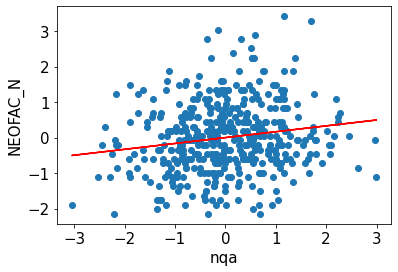

In [233]:
f = dic["file"][ind]
fd = pd.read_csv(f, sep =  '\t', index_col = 0)
x = fd[dic["diff_labels"][ind]]
y = fd[dic["pers_labels"][ind]]
idx = np.where(np.isnan(x))
idx2 = np.where(np.isnan(y)) 
x = np.delete(np.array(x),idx2[0].tolist()+ idx[0].tolist())
y = np.delete(np.array(y),idx2[0].tolist()+ idx[0].tolist())
x = (x-np.mean(x))/np.std(x)
y = (y-np.mean(y))/np.std(y)
x2 = sm2.add_constant(x)
ls = sm.OLS(y, x2).fit()
plt.scatter(x,y)
plt.plot(x,ls.params[0]+ls.params[1]*x, 'r-')
plt.xlabel('%s' %dic["diff_labels"][ind])
plt.ylabel('%s' %dic["pers_labels"][ind])
print(ls.params[1])

# Fitting polynomial regression models with different orders

In [234]:
# Thanks to Neuromatch academy courses for providing some of these functions
def plot_fitted_polynomials(x, y, theta_hat):
  """ Plot polynomials of different orders

  Args:
    x (ndarray): input vector of shape (n_samples)
    y (ndarray): vector of measurements of shape (n_samples)
    theta_hat (dict): polynomial regression weights for different orders
  """

  x_grid = np.linspace(x.min() - .5, x.max() + .5)

  plt.figure()

  for order in range(0, max_order + 1):
    X_design = make_design_matrix(x_grid, order)
    plt.plot(x_grid, X_design @ theta_hat[order]);

  plt.ylabel('y')
  plt.xlabel('x')
  plt.plot(x, y, 'C0.');
  plt.legend([f'order {o}' for o in range(max_order + 1)], loc=1)
  plt.title('polynomial fits')
  plt.show()

In [235]:

def make_design_matrix(x, order):
  """Create the design matrix of inputs for use in polynomial regression

  Args:
    x (ndarray): input vector of shape (samples,)
    order (scalar): polynomial regression order

  Returns:
    ndarray: design matrix for polynomial regression of shape (samples, order+1)
  """

  # Broadcast to shape (n x 1) so dimensions work
  if x.ndim == 1:
    x = x[:, None]
    
  

  #if x has more than one feature, we don't want multiple columns of ones so we assign
  # x^0 here
  design_matrix = np.ones((x.shape[0], 1))

  # Loop through rest of degrees and stack columns (hint: np.hstack)
  for degree in range(1, order + 1):
      design_matrix = np.hstack((design_matrix, x**degree))

  return design_matrix




In [236]:

def ordinary_least_squares(X, y):
  """Ordinary least squares estimator for linear regression.

  Args:
    X (ndarray): design matrix of shape (n_samples, n_regressors)
    y (ndarray): vector of measurements of shape (n_samples)

  Returns:
    ndarray: estimated parameter values of shape (n_regressors)
  """

  # Compute theta_hat using OLS
  theta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

  return theta_hat


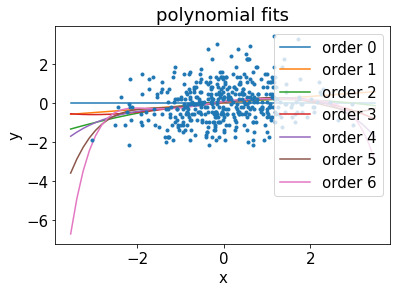

In [237]:

def solve_poly_reg(x, y, max_order):
  """Fit a polynomial regression model for each order 0 through max_order.

  Args:
    x (ndarray): input vector of shape (n_samples)
    y (ndarray): vector of measurements of shape (n_samples)
    max_order (scalar): max order for polynomial fits

  Returns:
    dict: fitted weights for each polynomial model (dict key is order)
  """

  # Create a dictionary with polynomial order as keys,
  # and np array of theta_hat (weights) as the values
  theta_hats = {}

  # Loop over polynomial orders from 0 through max_order
  for order in range(max_order + 1):

    # Create design matrix
    X_design = make_design_matrix(x, order)

    # Fit polynomial model
    this_theta = ordinary_least_squares(X_design, y)

    theta_hats[order] = this_theta
    

  return theta_hats


max_order = 6
theta_hats = solve_poly_reg(x, y, max_order)
#print(theta_hats)
#with plt.xkcd():
plot_fitted_polynomials(x, y, theta_hats)

## Compare train vs test errors

In [238]:
def evaluate_poly_reg(x, y, theta_hats, max_order):
    """ Evaluates MSE of polynomial regression models on data

    Args:
      x (ndarray): input vector of shape (n_samples)
      y (ndarray): vector of measurements of shape (n_samples)
      theta_hats (dict):  fitted weights for each polynomial model (dict key is order)
      max_order (scalar): max order of polynomial fit

    Returns
      (ndarray): mean squared error for each order, shape (max_order)
    """

    mse = np.zeros((max_order + 1))
    for order in range(0, max_order + 1):
      X_design = make_design_matrix(x, order)
      y_hat = np.dot(X_design, theta_hats[order])
      residuals = y - y_hat
      mse[order] = np.mean(residuals ** 2)

    return mse

def compute_mse(x_train,x_test,y_train,y_test,theta_hats,max_order):
  """Compute MSE on training data and test data.

  Args:
    x_train(ndarray): training data input vector of shape (n_samples)
    x_test(ndarray): test data input vector of shape (n_samples)
    y_train(ndarray): training vector of measurements of shape (n_samples)
    y_test(ndarray): test vector of measurements of shape (n_samples)
    theta_hats(dict): fitted weights for each polynomial model (dict key is order)
    max_order (scalar): max order of polynomial fit

  Returns:
    ndarray, ndarray: MSE error on training data and test data for each order
  """


  mse_train = evaluate_poly_reg(x_train, y_train,theta_hats, max_order)
  mse_test = evaluate_poly_reg(x_test, y_test,theta_hats, max_order)

  return mse_train, mse_test



In [239]:
idxx = np.random.choice(len(x),int(0.20*len(x)), replace = False)

x_test =  x[idxx]
y_test = y[idxx]
idxtrain = np.array(list(set(np.arange(0,len(x),1))- set(idxx)))
idxx, idxtrain;

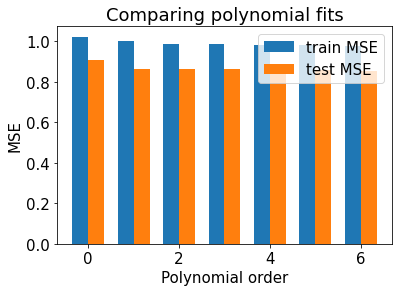

In [240]:


x_test =  x[idxx]
y_test = y[idxx]

x_train = x[idxtrain]
y_train = y[idxtrain]

mse_train, mse_test = compute_mse(x_train, x_test, y_train, y_test, theta_hats, max_order)

fig, ax = plt.subplots()
width = .35

ax.bar(np.arange(max_order + 1) - width / 2, mse_train, width, label="train MSE")
ax.bar(np.arange(max_order + 1) + width / 2, mse_test , width, label="test MSE")

ax.legend()
ax.set(xlabel='Polynomial order', ylabel='MSE', title ='Comparing polynomial fits');
#print(mse_test)

In [241]:
np.argmin(mse_test), np.argmin(mse_train)

(6, 6)

## Cross validation for model selection

In [242]:
from sklearn.model_selection import KFold

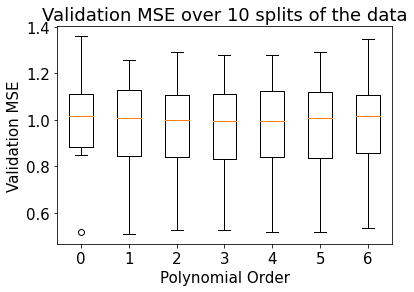

In [243]:
x_train = x
y_train = y
def cross_validate(x_train, y_train, max_order, n_splits):
  """ Compute MSE for k-fold validation for each order polynomial

  Args:
    x_train (ndarray): training data input vector of shape (n_samples)
    y_train (ndarray): training vector of measurements of shape (n_samples)
    max_order (scalar): max order of polynomial fit
    n_split (scalar): number of folds for k-fold validation

  Return:
    ndarray: MSE over splits for each model order, shape (n_splits, max_order + 1)

  """
  # Initialize the split method
  kfold_iterator = KFold(n_splits)

  # Initialize np array mse values for all models for each split
  mse_all = np.zeros((n_splits, max_order + 1))

  for i_split, (train_indices, val_indices) in enumerate(kfold_iterator.split(x_train)):

      # Split up the overall training data into cross-validation training and validation sets
      x_cv_train = x_train[train_indices]
      y_cv_train = y_train[train_indices]
      x_cv_val = x_train[val_indices]
      y_cv_val = y_train[val_indices]

      # Fit models
      theta_hats = solve_poly_reg(x_cv_train, y_cv_train, max_order)

      # Compute MSE
      mse_this_split = evaluate_poly_reg(x_cv_val, y_cv_val, theta_hats, max_order)

      mse_all[i_split] = mse_this_split

  return mse_all


max_order = 6
n_splits = 10
#with plt.xkcd():
plt.figure()

mse_all = cross_validate(x_train, y_train, max_order, n_splits)
plt.boxplot(mse_all, labels=np.arange(0, max_order + 1))

plt.xlabel('Polynomial Order')
plt.ylabel('Validation MSE')
plt.title(f'Validation MSE over {n_splits} splits of the data');

In [249]:
len(x_train)

434

In [247]:
np.mean(mse_all,axis = 0)

array([1.00217548, 0.98009201, 0.97389027, 0.97441742, 0.97519303,
       0.97798161, 0.99156974])

## Model selection through Akaike’s Information Criterion (AIC)

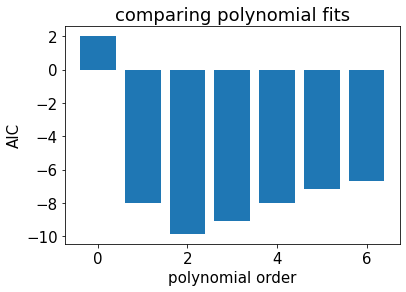

In [245]:
x_train = x
y_train = y
AIC_list = []
order_list = list(range(max_order + 1))

for order in order_list:

  # Compute predictions for this model
  X_design = make_design_matrix(x_train, order)
  y_hat = np.dot(X_design, theta_hats[order])

  # Compute SSE
  residuals = y_train - y_hat
  sse = np.sum(residuals ** 2)
  n_train_samples = len(residuals)
  # Get K
  K = len(theta_hats[order])

  # Compute AIC
  AIC = 2 * K + n_train_samples * np.log(sse / n_train_samples)

  AIC_list.append(AIC)

#with plt.xkcd():
plt.bar(order_list, AIC_list)
plt.ylabel('AIC')
plt.xlabel('polynomial order')
plt.title('comparing polynomial fits')
plt.show()

In [246]:
np.argmin(AIC_list)

2

## CONCLUSION: according to AIC the regression model up to second order polynomial best describes the data, however the errors on the validation sets are quite similar among the models (from the first order on), and it doesn't seem much reasonable to explore models more complicated than ordinary least squares